# Modelling Project

In this project, we aim to perform a Customer Analysis based on their purchase patterns.

# Background Information

We are external consultants hired by a local supermarket to identify target segments that have potential to increase spending in their local supermarket. We are also tasked to come up with a marketing campaign to address any existing potential increase in spending.

# Dataset obtained

We have set out to survey the customers of the supermarket and have collected 2239 responses from our survey. Using this response, we will seek to:

(1) Clean and Define our Independent Variables (IV) and Dependant Variables (DV)

(2) Identify Patterns/Clusters/Trends 

(3) Create Models used for prediction

(4) Ideate marketing strategies and plans for our client

# Define our Independent Variables (IV) and Dependant Variables (DV)

We will start off by looking at the data that we have collected

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.discrete.discrete_model import Probit
from sklearn.model_selection import train_test_split
import random
from scipy.stats import normaltest 
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing


orig_df = pd.read_csv('./Cust_analysis.csv',header=0 )
print(orig_df)
print("")
print(orig_df.columns)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0    4/9/2012       58       635  ...            

From this set of data, we will want to focus on the following variables:

IV: Year_Birth, Income, Kidhome, Teenhome, Dt_Customer, Recency

DV: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts

In [51]:
#Generating Dataset with only the above-mentioned data
useful_df = orig_df[['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
print("This is the DF without unused Columns:")
print(useful_df.head(5))
print("\n\n")

This is the DF without unused Columns:
   Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0    4/9/2012       58       635   
1        1954  46344.0        1         1    8/3/2014       38        11   
2        1965  71613.0        0         0   21/8/2013       26       426   
3        1984  26646.0        1         0   10/2/2014       26        11   
4        1981  58293.0        1         0   19/1/2014       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  
0         88              546              172                88  
1          1                6                2                 1  
2         49              127              111                21  
3          4               20               10                 3  
4         43              118               46                27  





# Cleaning of Independent and Dependent Variables

In [52]:
# check for missing values 
print(useful_df.isnull().sum())
print('------------------------------------')

Year_Birth           0
Income              24
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
dtype: int64
------------------------------------


In [53]:
#Removal of Null values from Income
useful_df = useful_df.dropna()
print(useful_df.isnull().sum())
useful_df = useful_df.reset_index(drop=True)
print(useful_df.shape)

Year_Birth          0
Income              0
Kidhome             0
Teenhome            0
Dt_Customer         0
Recency             0
MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
dtype: int64
(2216, 11)


In [54]:
#Removal of Data where any DV = 0
no_zero_df = useful_df[useful_df.MntWines > 1]
print("This is the shape after removal of 0 Wine spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntFruits > 1]
print("This is the shape after removal of 0 Fruit spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntMeatProducts > 1]
print("This is the shape after removal of 0 Meat spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntFishProducts > 1]
print("This is the shape after removal of 0 Fish spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.MntSweetProducts > 1]
no_zero_df = no_zero_df.reset_index(drop=True)
print("This is the shape after removal of 0 Sweets spendings ", no_zero_df.shape)
no_zero_df = no_zero_df[no_zero_df.Year_Birth > 1920]
no_zero_df = no_zero_df[no_zero_df.Income < 140000]
print("This is the shape after removal of other rubbish input ", no_zero_df.shape)
print("\n\n", no_zero_df.head(5))

This is the shape after removal of 0 Wine spendings  (2166, 11)
This is the shape after removal of 0 Fruit spendings  (1627, 11)
This is the shape after removal of 0 Meat spendings  (1624, 11)
This is the shape after removal of 0 Fish spendings  (1477, 11)
This is the shape after removal of 0 Sweets spendings  (1285, 11)
This is the shape after removal of other rubbish input  (1282, 11)


    Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0    4/9/2012       58       635   
1        1965  71613.0        0         0   21/8/2013       26       426   
2        1984  26646.0        1         0   10/2/2014       26        11   
3        1981  58293.0        1         0   19/1/2014       94       173   
4        1971  55635.0        0         1  13/11/2012       34       235   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  
0         88              546              172                88  
1         49    

# Re-formatting IV

Here we will look at the 6 Existing IV and Reformat them for easier usage.

In [55]:
#Converting Year of Birth to a numerical Age
no_zero_df['Age'] = 2021 - no_zero_df['Year_Birth']

#Add number of Teens and number of Kids to become Number of Dependents
no_zero_df['Dependents'] = no_zero_df['Kidhome'] + no_zero_df['Teenhome']

#Calculating number of days since customer registered
from datetime import date
from datetime import datetime

no_zero_df['Days_Regis'] = ""
num_of_days = []

for index, row in no_zero_df.iterrows():
    d1 = datetime.strptime('23/8/2021', '%d/%m/%Y') 
    d2 = datetime.strptime(row['Dt_Customer'], '%d/%m/%Y')
    difference = d1-d2
    num_of_days.append(difference.days)
    
no_zero_df['Days_Regis'] = num_of_days

print(no_zero_df.head(5))

   Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0    4/9/2012       58       635   
1        1965  71613.0        0         0   21/8/2013       26       426   
2        1984  26646.0        1         0   10/2/2014       26        11   
3        1981  58293.0        1         0   19/1/2014       94       173   
4        1971  55635.0        0         1  13/11/2012       34       235   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  Age  \
0         88              546              172                88   64   
1         49              127              111                21   56   
2          4               20               10                 3   37   
3         43              118               46                27   40   
4         65              164               50                49   50   

   Dependents  Days_Regis  
0           0        3275  
1           0        2924  
2           1       

In [56]:
#Convert to Reformatted DF
reformat_df = no_zero_df[['Age', 'Income', 'Dependents', 'Days_Regis', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
print(reformat_df.head(3))
print("\n\nThis is the shape of the reformatted df ", reformat_df.shape)

   Age   Income  Dependents  Days_Regis  Recency  MntWines  MntFruits  \
0   64  58138.0           0        3275       58       635         88   
1   56  71613.0           0        2924       26       426         49   
2   37  26646.0           1        2751       26        11          4   

   MntMeatProducts  MntFishProducts  MntSweetProducts  
0              546              172                88  
1              127              111                21  
2               20               10                 3  


This is the shape of the reformatted df  (1282, 10)


# Defining DV

Here we will look at the 5 Existing DV and Test for Correlation between each of the DV.

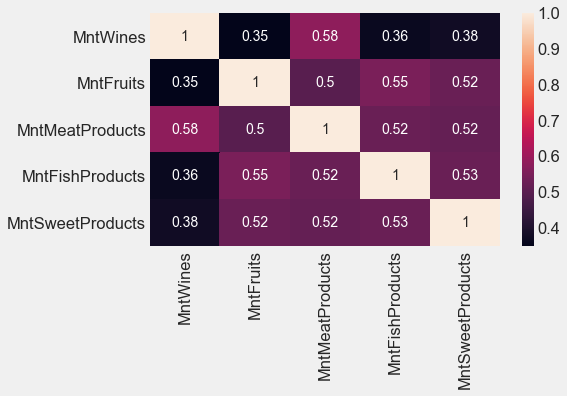

In [57]:
#Testing for Correlation between all DV


dv_df = reformat_df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]

corrMatrix = dv_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()   

From this Correlation Test, we see that ALL products are positively correlated. Since the correlation values are in the low to mid-range, it also means that generally higher-spenders may have preferences in certain basket of goods, but they will also tend to spend on products not in their preferred basket. Similarly, low-spenders will spend lower across the board as well.

For DV that we will want to look at, we will look at
- Wines - the product that seems to be least related to all other products may require a specific marketing campaign on its own
- Fruits - the product that seems most correlated to the remaining products may produce the highest spillover effect from its marketing campaign

# EDA for Wines

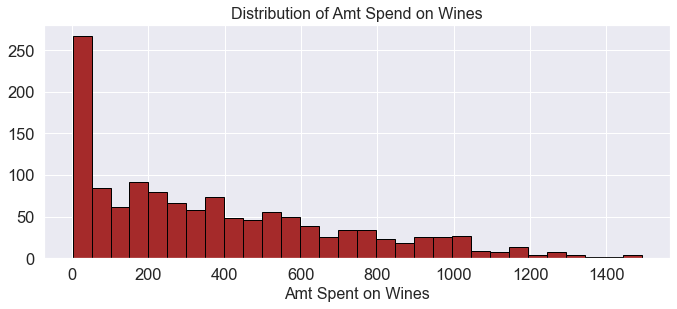

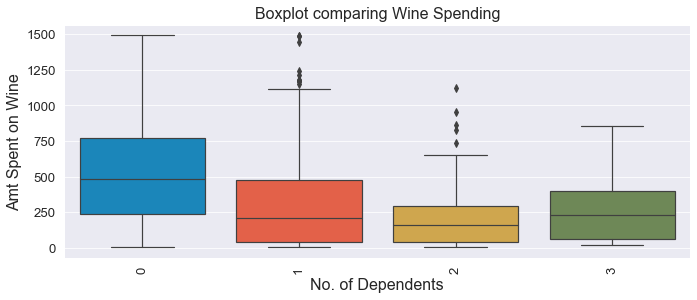

In [58]:
# histogram 
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [10,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

result = plt.hist(reformat_df['MntWines'], color='Brown', edgecolor='black', bins = 30) 
plt.title('Distribution of Amt Spend on Wines')
plt.xlabel('Amt Spent on Wines')
plt.show()

#Boxplot
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing Wine Spending')
sns.boxplot(x='Dependents', y='MntWines', data=reformat_df)
plt.xlabel('No. of Dependents')
plt.ylabel('Amt Spent on Wine')
plt.xticks(rotation=90)
plt.show()


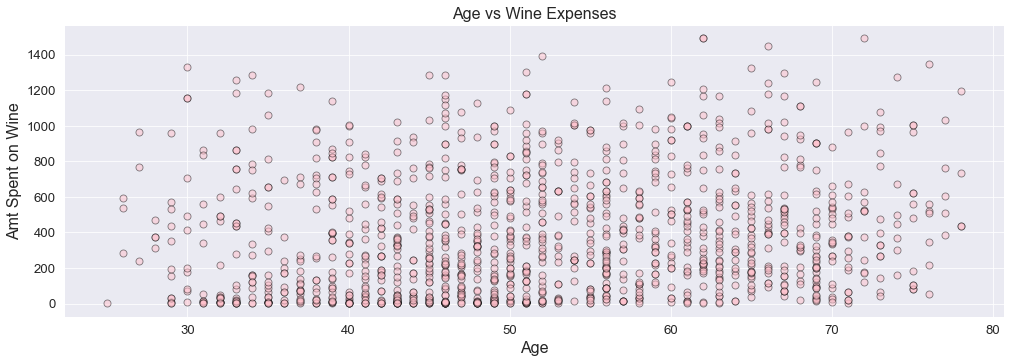

Line plot to visualize the mean & count over age


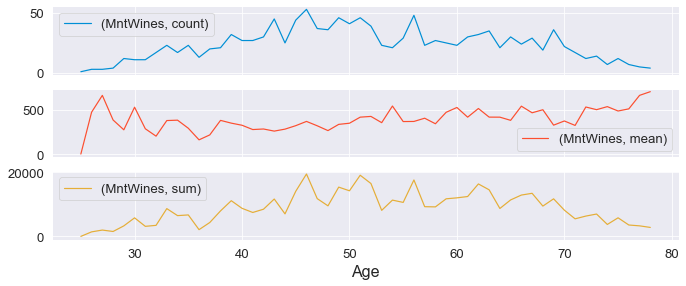

In [59]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Age'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Age vs Wine Expenses")
plt.xlabel('Age')
plt.ylabel('Amt Spent on Wine') 
plt.show()

print("Line plot to visualize the mean & count over age")
#line plot
age_agg = reformat_df[['Age', 'MntWines']]
age_agg = age_agg.groupby('Age').agg(['count', 'mean', 'sum'])
age_agg.plot.line(subplots=True)
plt.show()


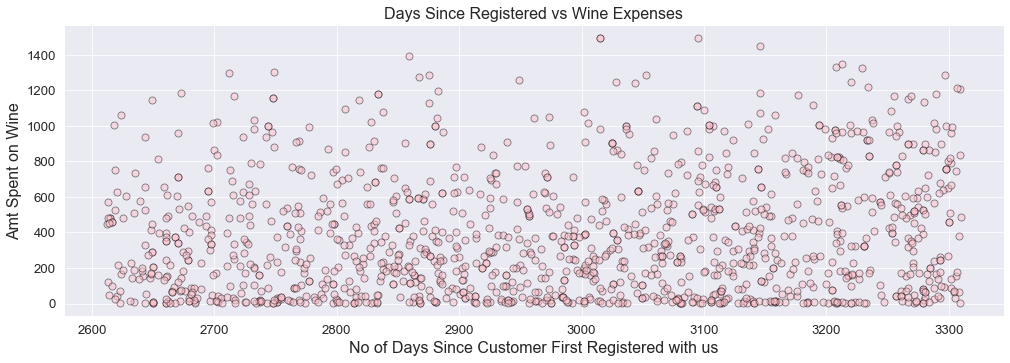

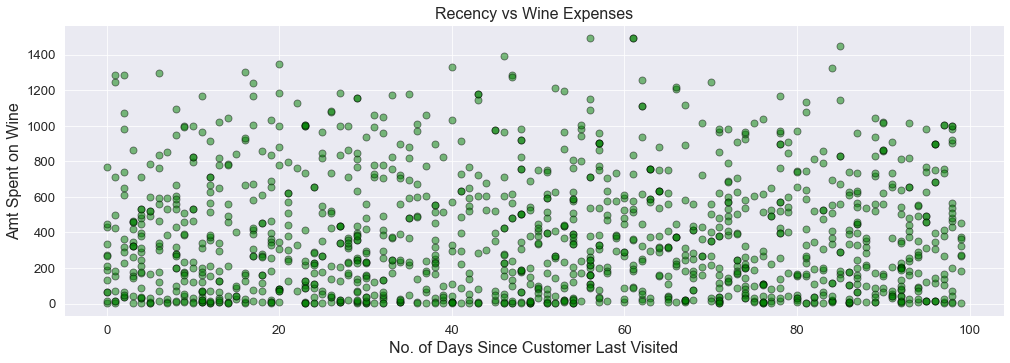

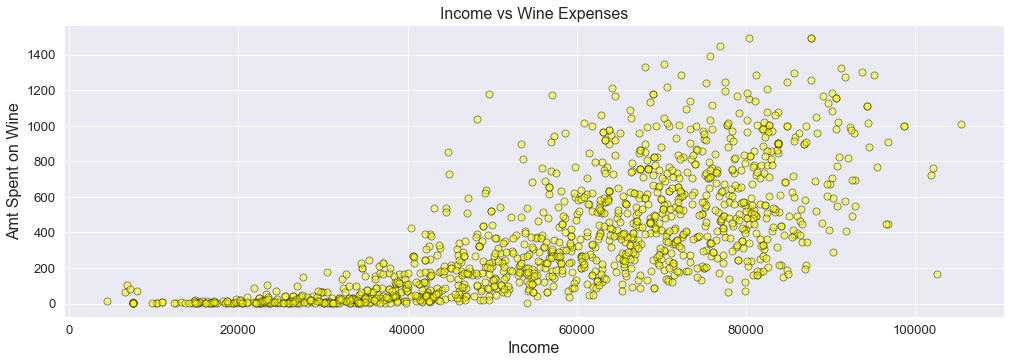

In [60]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Days_Regis'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Days Since Registered vs Wine Expenses")
plt.xlabel('No of Days Since Customer First Registered with us')
plt.ylabel('Amt Spent on Wine') 
plt.show()

#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Recency'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='green')

plt.title("Recency vs Wine Expenses")
plt.xlabel('No. of Days Since Customer Last Visited')
plt.ylabel('Amt Spent on Wine') 
plt.show()

#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Income'],reformat_df['MntWines'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')

plt.title("Income vs Wine Expenses")
plt.xlabel('Income')
plt.ylabel('Amt Spent on Wine') 
plt.show()


The EDA has shown a few IV that affects the Amount spent on wine. Visually, we can see that Number of Dependents and Income has the most Impact.

# EDA for Fruits

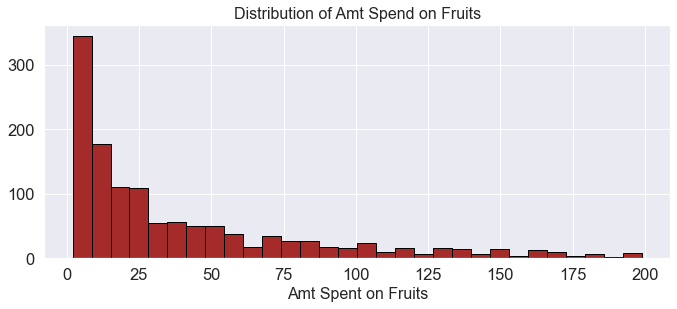

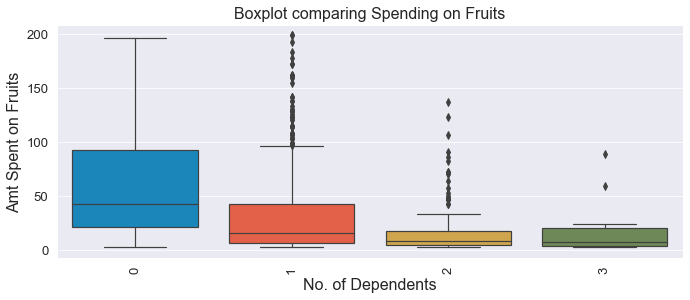

In [61]:
# histogram 
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [10,4]
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

result = plt.hist(reformat_df['MntFruits'], color='Brown', edgecolor='black', bins = 30) 
plt.title('Distribution of Amt Spend on Fruits')
plt.xlabel('Amt Spent on Fruits')
plt.show()

#Boxplot
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing Spending on Fruits')
sns.boxplot(x='Dependents', y='MntFruits', data=reformat_df)
plt.xlabel('No. of Dependents')
plt.ylabel('Amt Spent on Fruits')
plt.xticks(rotation=90)
plt.show()

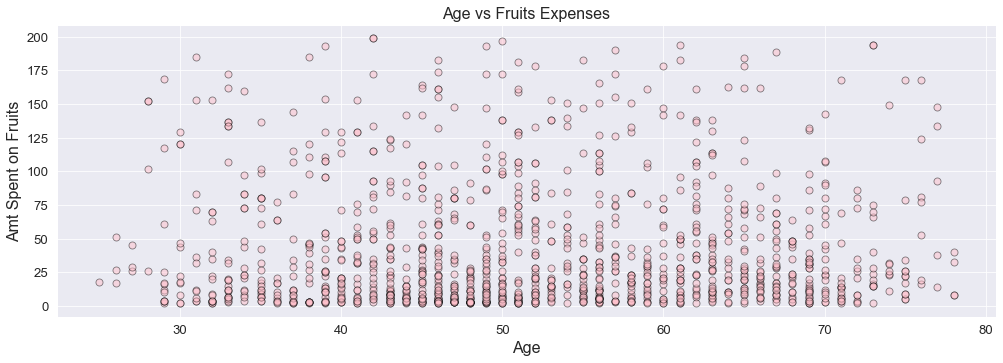

Line plot to visualize the mean & count over age


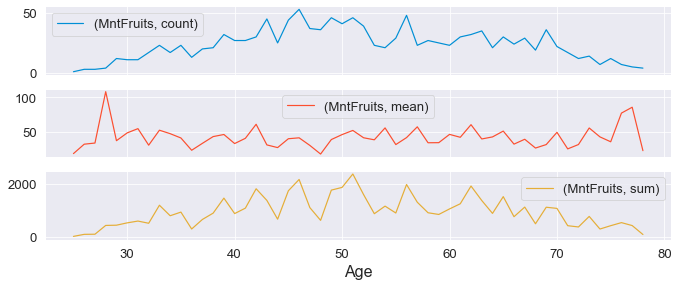

In [62]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Age'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Age vs Fruits Expenses")
plt.xlabel('Age')
plt.ylabel('Amt Spent on Fruits') 
plt.show()

print("Line plot to visualize the mean & count over age")
#line plot
age_agg = reformat_df[['Age', 'MntFruits']]
age_agg = age_agg.groupby('Age').agg(['count', 'mean', 'sum'])
age_agg.plot.line(subplots=True)
plt.show()


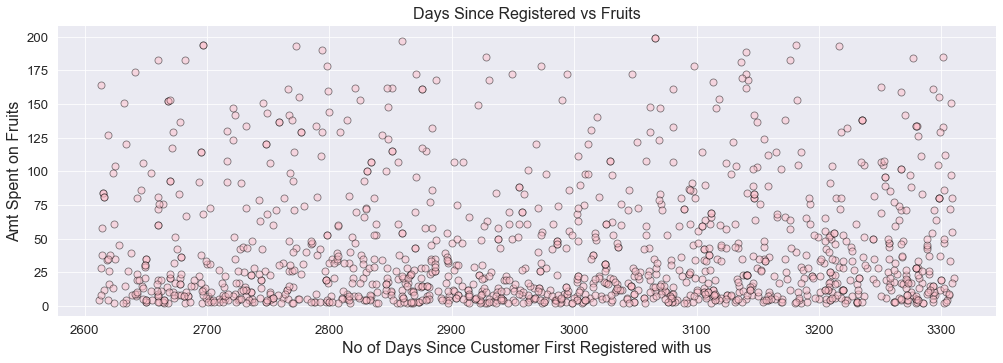

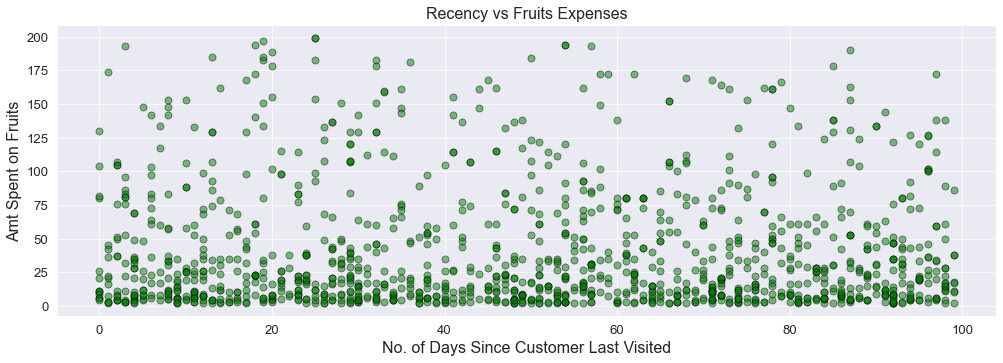

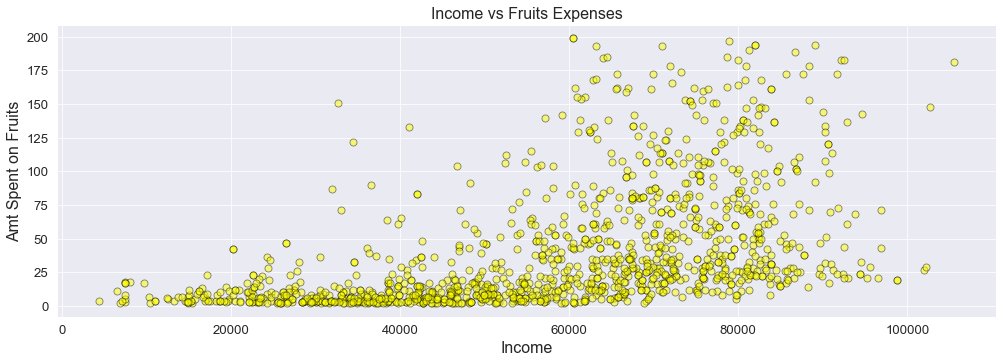

In [63]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Days_Regis'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='pink')

plt.title("Days Since Registered vs Fruits")
plt.xlabel('No of Days Since Customer First Registered with us')
plt.ylabel('Amt Spent on Fruits') 
plt.show()

#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Recency'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='green')

plt.title("Recency vs Fruits Expenses")
plt.xlabel('No. of Days Since Customer Last Visited')
plt.ylabel('Amt Spent on Fruits') 
plt.show()

#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['Income'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')

plt.title("Income vs Fruits Expenses")
plt.xlabel('Income')
plt.ylabel('Amt Spent on Fruits') 
plt.show()


Similar to Wine, we can see that dependents and income are the main factors for difference in Spending on Fruits Expenses. There are also some small clusters forming in the Age Scatterplot.

In [64]:
# Feature Selection with Univariate Statistical Tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier



feat_select_wines = reformat_df[['Age', 'Income', 'Dependents', 'Days_Regis', 'Recency', 'MntWines']]

array = feat_select_wines.values
X = array[:,0:5]
Y = array[:,5]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print("Scores of Each individual IV to Predict Wine Expenses with Univariate Feature Selection:")
print(fit.scores_)

#Using Feature Importance to Score
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print("\nScore of Each Individual IV to Predict Wine Expenses with Feature Importance Selection Method:")
print(model.feature_importances_)

Scores of Each individual IV to Predict Wine Expenses with Univariate Feature Selection:
[1.607 6.704 1.565 1.256 1.261]

Score of Each Individual IV to Predict Wine Expenses with Feature Importance Selection Method:
[0.227 0.26  0.026 0.249 0.238]


In [65]:
feat_select_Fruits = reformat_df[['Age', 'Income', 'Dependents', 'Days_Regis', 'Recency', 'MntFruits']]

array = feat_select_Fruits.values
X = array[:,0:5]
Y = array[:,5]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print("Scores of Each individual IV to Predict Fruits Expenses with Univariate Feature Selection:")
print(fit.scores_)

#Using Feature Importance to Score
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print("\nScore of Each Individual IV to Predict Fruits Expenses with Feature Importance Selection Method:")
print(model.feature_importances_)



Scores of Each individual IV to Predict Fruits Expenses with Univariate Feature Selection:
[1.327 7.829 2.914 1.423 1.185]

Score of Each Individual IV to Predict Fruits Expenses with Feature Importance Selection Method:
[0.218 0.26  0.043 0.243 0.237]


For both Wines and Fruits, Selection by Feature Importance gave close results. Hence, looking at Univariate Feature Selection may provide more insights.

Similar to expectations from the EDA, for WINES, Income and No. of Dependents are the main features, however, Age and Days Registered seem to have some usefulness as well.

For Fruits, only Income seem to stand out - Dependents and Days Registered may come in useful though.

We will now move into the next phase of preparing for our models

# Normality Test for DVs



This is for the  MntWines  column.
stat=122.89, p=0.0000
Not Approximately Normally Distributed


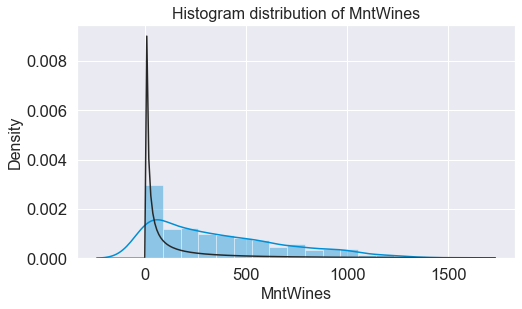



This is for the  MntFruits  column.
stat=326.92, p=0.0000
Not Approximately Normally Distributed


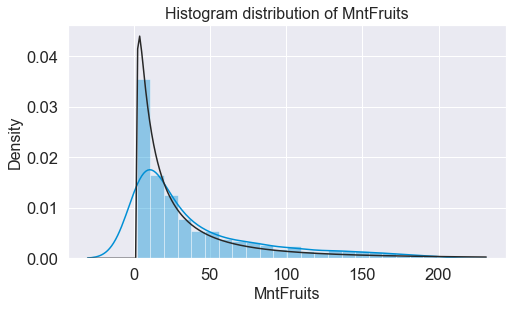



This is for the  MntMeatProducts  column.
stat=236.98, p=0.0000
Not Approximately Normally Distributed


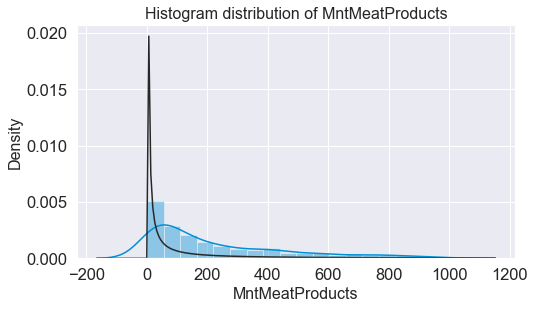



This is for the  MntFishProducts  column.
stat=270.56, p=0.0000
Not Approximately Normally Distributed


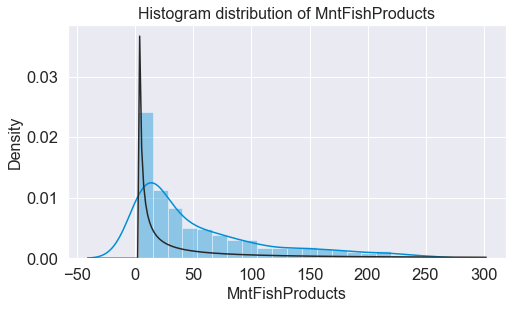



This is for the  MntSweetProducts  column.
stat=304.56, p=0.0000
Not Approximately Normally Distributed


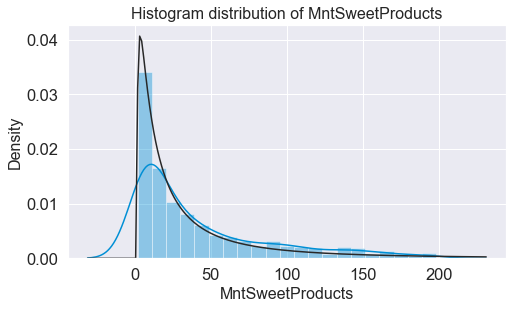

In [66]:
#Test of Normality for all 5 product types

for column in dv_df:
    print("\n\nThis is for the ", column, " column.")
    # normal test
    stat, p = normaltest(dv_df[column])       
    
    print('stat=%.2f, p=%.4f' % (stat, p))
    
    alpha = 0.05
    
    if p > alpha:
        print('Approximately Normally Distributed')
    else:
        print('Not Approximately Normally Distributed')
    
    # histogram 
    plt.style.use('fivethirtyeight')
    plt.rcParams["figure.figsize"] = [7,4]
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
    
     # to remove the warning message on future version
    import warnings 
    warnings.simplefilter(action="ignore", category=FutureWarning)

    sns.distplot(dv_df[column],fit=stats.lognorm,kde=True)
    plt.title('Histogram distribution of ' + column)
    plt.xlabel(column)
    plt.show()

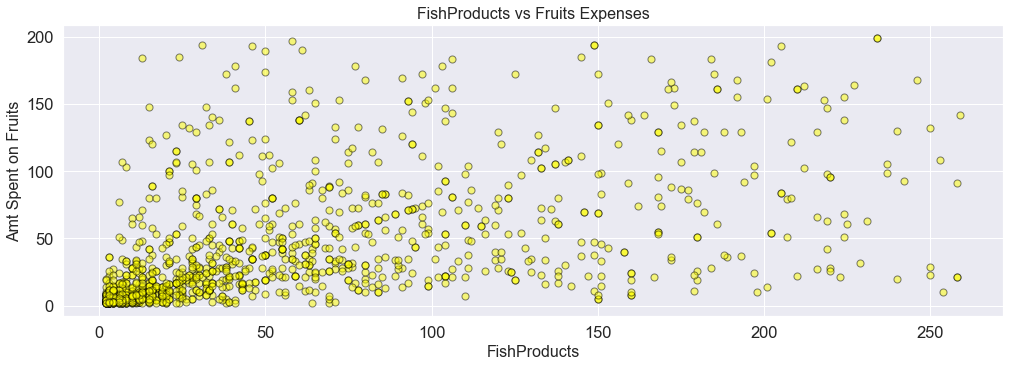

In [67]:
#Scatterplot
plt.subplots(figsize=(15,5)) 
plt.scatter(reformat_df['MntFishProducts'],reformat_df['MntFruits'], s = 50, edgecolor = 'black', alpha = 0.5, color ='yellow')

plt.title("FishProducts vs Fruits Expenses")
plt.xlabel('FishProducts')
plt.ylabel('Amt Spent on Fruits') 
plt.show()

# Transformation & Normalisation

In [68]:
def normality_check(data):
    
    # boxplot
    plt.figure(figsize=(12,2))
    sns.boxplot(x = data, orient = 'h')
    
    # normal test
    stat, p = normaltest(data)       
    
    print('stat=%.2f, p=%.2f' % (stat, p))
    
    alpha = 0.05
    
    if p > alpha:
        print('Approximately Normally Distributed')
    else:
        print('Not Approximately Normally Distributed')

In [69]:
def more_norm_test(data):
    
    # Shapiro test (set sample size to 3000)
    if data.shape[0] > 5000:
        stat, p = shapiro(random.sample(list(data), k=3000))
    else:
        stat, p = shapiro(data)
    print('Shapiro test result: \n')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject the null hypothesis)')
    else:
        print('Sample does not look Gaussian (reject the null hypothesis)')
        
    print('--------------------------------------------------')
    
    # Anderson-Darling test
    result = anderson(data)
    print('Anderson-Darling test result: \n')
    print('Statistic: %.3f' % result.statistic)
    p = 0.05
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
    print('--------------------------------------------------')
    
    # Skewness & Kurtosis Statistics
    print('Skewness is {0} and Kurtosis is {1}'.format(stats.skew(data), stats.kurtosis(data, fisher=False)))

In [70]:
sqrtx_rating = np.sqrt(dv_df)
sqrtx_rating

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,25.199206,9.380832,23.366643,13.114877,9.380832
1,20.639767,7.000000,11.269428,10.535654,4.582576
2,3.316625,2.000000,4.472136,3.162278,1.732051
3,13.152946,6.557439,10.862780,6.782330,5.196152
4,15.329710,8.062258,12.806248,7.071068,7.000000
...,...,...,...,...,...
1280,29.206164,3.162278,11.958261,3.605551,3.162278
1281,1.732051,1.732051,2.645751,2.449490,1.414214
1282,26.627054,6.557439,13.490738,6.480741,10.862780
1283,30.133038,6.928203,14.730920,5.656854,3.464102


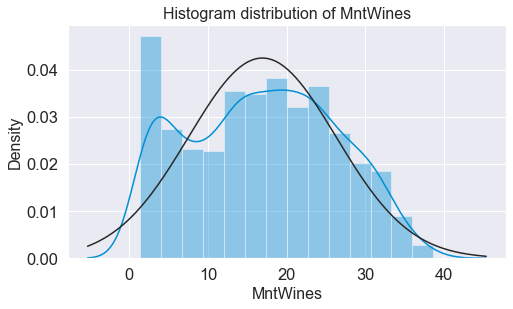

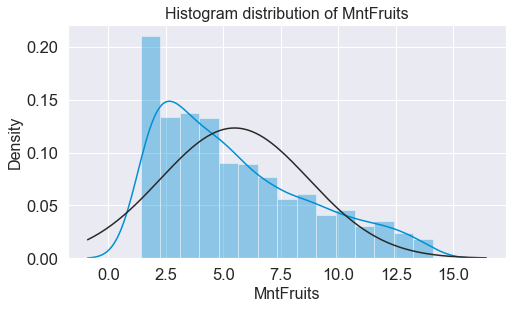

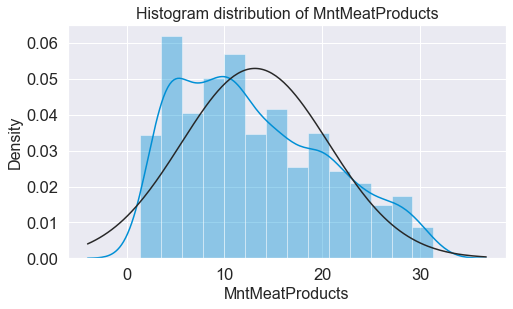

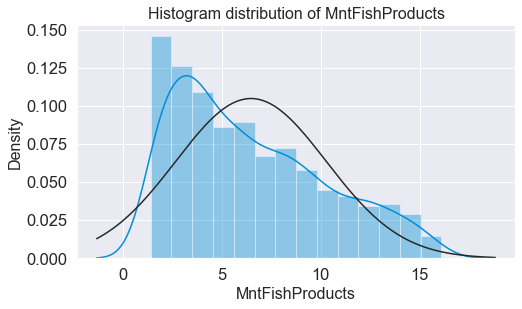

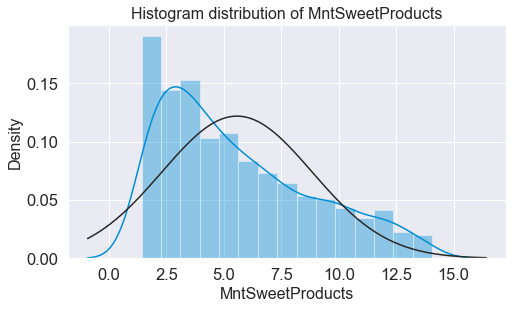

In [71]:
for i in sqrtx_rating:
    plt.style.use('fivethirtyeight')
    plt.rcParams["figure.figsize"] = [7,4]
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
    
    # to remove the warning message on future version
    import warnings 
    warnings.simplefilter(action="ignore", category=FutureWarning)

    sns.distplot(sqrtx_rating[i],fit=stats.norm,kde=True)
    plt.title('Histogram distribution of ' + i)
    plt.xlabel(i)
    plt.show()

## Removal of Outliers for Sqrt Transformation data and testing of Normality

stat=252.57, p=0.00
Not Approximately Normally Distributed


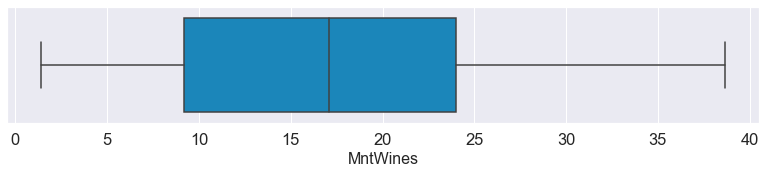

In [72]:
normality_check(sqrtx_rating["MntWines"])

The 1st Quartile: 9.178749656756981
The 3rd Quartile: 24.0
The IQR (50% between 1st to 3rd QR): 14.821250343243019
The Lower Whisker is : -13.053125858107546 and Upper Whisker is 46.23187551486453
stat=252.57, p=0.00
Not Approximately Normally Distributed
Shapiro test result: 

Statistics=0.968, p=0.000
Sample does not look Gaussian (reject the null hypothesis)
--------------------------------------------------
Anderson-Darling test result: 

Statistic: 8.768
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)
--------------------------------------------------
Skewness is 0.0395725923186206 and Kurtosis is 2.018870530084827


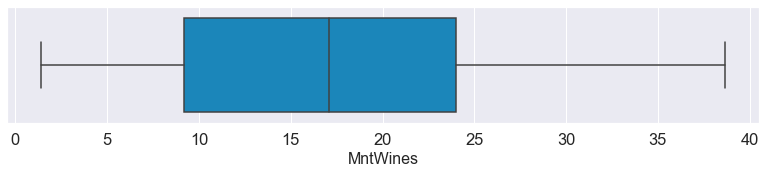

In [73]:
Q1 = sqrtx_rating.MntWines.quantile(0.25)
Q3 = sqrtx_rating.MntWines.quantile(0.75)
IQR = Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}'.format(Lower_Whisker, Upper_Whisker))

outlier2 = sqrtx_rating[sqrtx_rating.MntWines < Upper_Whisker]
outlier3 = outlier2[sqrtx_rating.MntWines > Lower_Whisker]
normality_check(outlier3.MntWines)
more_norm_test(outlier3.MntWines)

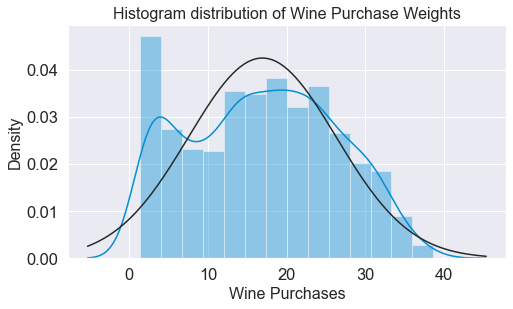

In [74]:
sns.distplot(outlier3.MntWines,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Wine Purchase Weights')
plt.xlabel('Wine Purchases')
plt.show()

After Sqrt transformation and Outlier removal, distribution is still not normal. We will try using other transformation methods below.

## Transformation using Boxcox and Yeo Johnson Method

stat=222.52, p=0.00
Not Approximately Normally Distributed
stat=238.20, p=0.00
Not Approximately Normally Distributed


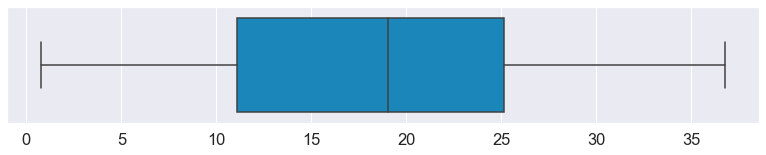

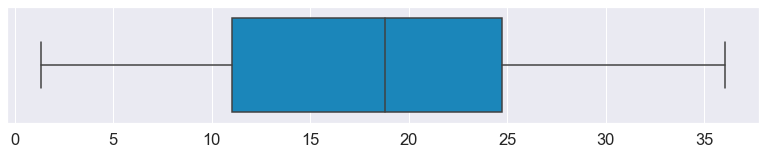

In [75]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import skew

box_cox, best_Lambda_maxlog = boxcox(dv_df["MntWines"])
yeo_John, best_Lambda_Yeo_John = yeojohnson(dv_df["MntWines"])
normality_check(box_cox)
# more_norm_test(box_cox)
normality_check(yeo_John)
# more_norm_test(yeo_John)

### As Transformed data  is still not normal, we will revert to original Wine Purchase prices before sqrt transformation (de-transformed). 

# Regression

## 1. Multiple Linear Regression
> IV: Income, Dependents

> DV: Wine

In [76]:
reformat_df

,Age,Income,Dependents,Days_Regis,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,64,58138.0,0,3275,58,635,88,546,172,88
1,56,71613.0,0,2924,26,426,49,127,111,21
2,37,26646.0,1,2751,26,11,4,20,10,3
3,40,58293.0,1,2773,94,173,43,118,46,27
4,50,55635.0,1,3205,34,235,65,164,50,49
...,...,...,...,...,...,...,...,...,...,...
1280,51,44802.0,0,3289,71,853,10,143,13,10
1281,47,34421.0,1,2975,81,3,3,7,6,2
1282,54,61223.0,1,2993,46,709,43,182,42,118
1283,40,56981.0,0,2767,91,908,48,217,32,12


In [77]:
from sklearn.linear_model import LinearRegression

X1 = reformat_df[['Income', 'Dependents']]
y1 = reformat_df['MntWines']

reg = LinearRegression().fit(X1,y1)
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)  

intercept: -224.57542317500247
slope: [ 1.088e-02 -4.045e+01]


<div align="center"> $\hat{y} = -224.57542317500258 + 0.01088X_{1} - 40.45X_{2}$ </div>

In [78]:
reformat_df["Income"].describe()

count      1282.000000
mean      57768.616225
std       20701.654884
min        4428.000000
25%       42169.500000
50%       61281.000000
75%       74183.750000
max      105471.000000
Name: Income, dtype: float64

In [79]:
reformat_df["Dependents"].describe()

count    1282.000000
mean        0.748830
std         0.701912
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Dependents, dtype: float64

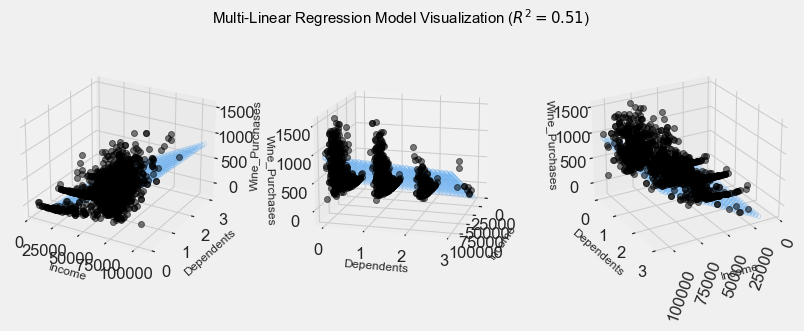

In [80]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
X = reformat_df[['Income', 'Dependents']].values.reshape(-1,2)
Y = reformat_df['MntWines']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(17000, 106000, 30)  # range of Income
yy_pred = np.linspace(0, 3, 30)  # range of Dependents
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
model = LinearRegression().fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

# ax1 = fig.add_subplot(111, projection='3d')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]
# axes = [ax1]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Income', fontsize=12)
    ax.set_ylabel('Dependents', fontsize=12)
    ax.set_zlabel('Wine_Purchases', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')
plt.xticks(rotation=70)
fig.tight_layout()

<img src="Dependents_Income2.gif" width=500 align="center">

In [81]:
# Code used to make GIF of spinning 3D Model

# for ii in np.arange(0, 360, 1):
#     ax1.view_init(elev=32, azim=ii)
#     extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     fig.savefig('gif_image%d.png' % ii, box_inches="tight")

## Validation of Model

In [82]:
y_actual = y1                   #observed y values
y_predicted = reg.predict(X1)   #predicted y values
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
print('MSE:',MSE)               
print('Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))):',reg.singular_)

MSE: 54267.32302604561
Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))): [7.409e+05 2.334e+01]


In [83]:
from scipy import stats

X1_std_err = np.sqrt(MSE)/reg.singular_
T_stats = reg.coef_/X1_std_err
P_value = stats.t.sf(np.abs(T_stats), len(X1-1)*2) 

print('The Standard Error is:', X1_std_err)
print('The T Statistics is (b1 / X1_S.E.) : ',reg.coef_/X1_std_err)
print('The P-value is : ',P_value) #

The Standard Error is: [3.144e-04 9.983e+00]
The T Statistics is (b1 / X1_S.E.) :  [34.613 -4.052]
The P-value is :  [4.848e-216 2.614e-005]


As P-vale <0.05, there is sufficient evidence that the IVs: (1) Income and (2) Age affect Wine Spending. 

In [84]:
r_sq_mlr = reg.score(X1, y1)
print('coefficient of determination:', r_sq_mlr) #refers to how close the data are to the fitted regression line
print('Pearson Correlation:',np.sqrt(r_sq_mlr))

coefficient of determination: 0.5089800293772425
Pearson Correlation: 0.7134283631712734


In [85]:
predicted = reg.predict([[50000, 1]])
print(f" A customer with Income:$50000 and Dependent:1 is expected to spend ${predicted[0].round()} on Wine products.")

 A customer with Income:$50000 and Dependent:1 is expected to spend $279.0 on Wine products.


## Chi Square Goodness of Fit for Non-Normal data

In [86]:
from numpy.random import randn
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSampling = StratifiedShuffleSplit(n_splits=1, test_size=0.05)

for x, y in stratifiedSampling.split(reformat_df, reformat_df.Dependents):
    stratified_random_sample = reformat_df.iloc[y].sort_values(by='Dependents')

In [87]:
observation = stratified_random_sample.loc[:,'MntWines'].tolist()
# observation

In [88]:
stratified_random_sample.head()

,Age,Income,Dependents,Days_Regis,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
969,38,86580.0,0,3099,72,532,21,127,26,20
897,29,34935.0,0,2985,71,34,4,66,3,10
114,67,77972.0,0,2715,18,613,22,319,33,102
34,39,75777.0,0,2972,12,712,26,538,69,13
1137,58,32632.0,0,3308,32,63,151,137,153,19


In [89]:
Dependents = []
Income = []
Prediction = []

for row in stratified_random_sample.iterrows():
    Dependents.append(row[1][2])
    Income.append(row[1][1])

for i in range(len(stratified_random_sample)):
    Prediction.append(reg.predict([[Income[i], Dependents[i]]]).tolist())

flat_list = [item for sublist in Prediction for item in sublist]

print(flat_list)

[717.621372430146, 155.6006573801588, 623.9458120632123, 600.0589794649991, 130.53852732381023, 724.0528612982754, 691.9280641092433, 600.2439799908167, 715.9781324655308, 750.6602898643945, 672.7859508790579, 323.38525191284737, 537.6049784257527, 657.4526720039406, 574.1371410827924, 443.77706468461633, 683.4833342248636, 583.9095217995101, 585.9989395028617, 786.5068623375217, 681.4592108247417, 687.8471701573845, 364.86889923147555, -41.609903141399315, 561.0238685174862, 668.128290582003, 487.4046149864695, 414.57970211756606, 115.51002855761351, 81.88346239429745, 667.5189504457073, -216.8379748817632, 402.5655503232939, 86.47582838812241, 346.3580376263594, 517.984113665731, 519.7797070045489, 398.0820081681851, 325.03944762184926, 96.80321068229296, 519.1920582754813, 442.66713489022595, 407.7564474300583, 517.0482286527714, 369.9619282439104, 429.7170980829942, 439.2065368190497, 177.76814668717066, -183.4072916281363, 74.10255792608677, 424.7112015020474, 367.4154504179505, 4

In [90]:
from scipy.stats import chisquare

(chisq, pvalue) = chisquare(f_obs=observation, f_exp=flat_list,ddof=0)    #0 is the MLE of variance for sample s.d. of the believed normally distributed variables 
print('The chi-square is',chisq)
print('The P-value is', pvalue)

The chi-square is 5114.886074452068
The P-value is 0.0


### Conclusion: 
> Multiple Linear Regression is not a good fit as R^2 of 0.28 is too low. Only 28% of our dependent variable can be explained using our independent variables.

> High MSE of 77669 indicates high error.

> As chi-sq P<0.05, there is sufficient evidence to conclude that the observed data is significantly different from the predicted data using the MLR Model

## 2. Non-Linear (Exponential) Regression
> IV: Income

> DV: Wine

In [91]:
X2 = reformat_df.Income.values
y2 = reformat_df.MntWines.values

fit = np.polyfit(X2, np.log(y2), 1)
print('The Equation can be written as : ln(y)={}+{}(x)'.format(fit[1], fit[0]))
print(fit)

The Equation can be written as : ln(y)=1.4500348839528718+6.438076388879855e-05(x)
[6.438e-05 1.450e+00]


In [92]:
print('The Equation by taking exp^() on both sides /n can be re-written as : y={}*{}ˣ'.format(np.exp(fit[1]), np.exp(fit[0])))

The Equation by taking exp^() on both sides /n can be re-written as : y=4.263263232048553*1.0000643828363747ˣ


In [93]:
def exponential_Regression_fit_rawValues(x_input):
      return np.exp(fit[1])*np.exp(fit[0])**x_input
    
print(exponential_Regression_fit_rawValues(2))
print(exponential_Regression_fit_rawValues(100))

4.263812211678599
4.290798989948441


In [94]:
def origRegModel(x_input1):
      return -224.57542317500247 + 0.01088*x_input1
# origRegModel(X2)

Text(0, 0.5, 'Wine Purchases')

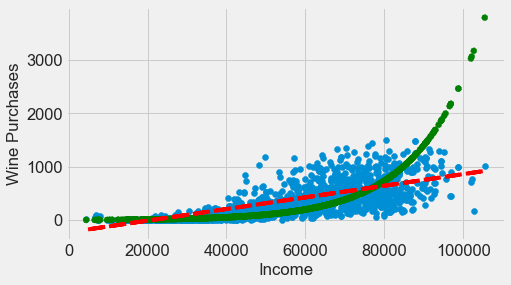

In [95]:
plt.scatter(X2,y2)
plt.scatter(X2, exponential_Regression_fit_rawValues(X2), linestyle = 'dashed', color='g')
plt.plot(X2, origRegModel(X2), linestyle = 'dashed', color='r')
plt.xlabel("Income")
plt.ylabel("Wine Purchases")

In [96]:
from sklearn.metrics import r2_score

expReg_Score = r2_score(y2, exponential_Regression_fit_rawValues(X2))

print('The score in Exponential Reg is: {}'.format(expReg_Score))

The score in Exponential Reg is: -0.09221381497863157


## 3. Ridge Regression

In [97]:
from sklearn.linear_model import Ridge

X3 = np.array(reformat_df.Income.values).reshape(-1,1)
y3 = np.array(reformat_df.MntWines.values).reshape(-1,1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=123, shuffle=True)

ridgeReg = Ridge(alpha=1.0, normalize='True',max_iter=1000, solver='saga',random_state=123)
#compare old ver sag vs saga
ridgeReg.fit(X_train3, y_train3)

Ridge(max_iter=1000, normalize='True', random_state=123, solver='saga')

coefficient of determination: 0.36684359921958387
Pearson Correlation: 0.6056761504464113


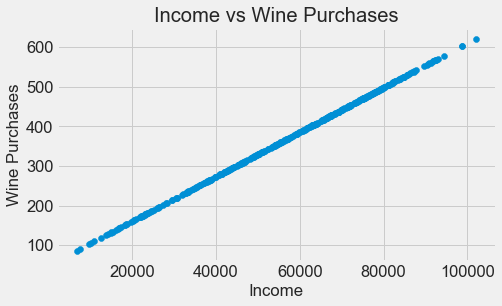

In [98]:
X_Newsamples3 = np.array([50000,60000]).reshape(-1,1)

# print(ridgeReg.predict(X_Newsamples3))
# print(ridgeReg.predict(X_test3))

#scores
r_sq = ridgeReg.score(X_train3, y_train3)  #R^2
print('coefficient of determination:', r_sq)
print('Pearson Correlation:',np.sqrt(r_sq))

y_predict_test3 = ridgeReg.predict(X_test3)
plt.scatter(X_test3, y_predict_test3)  
plt.title('Income vs Wine Purchases')  
plt.xlabel('Income')  
plt.ylabel('Wine Purchases')  
plt.show()

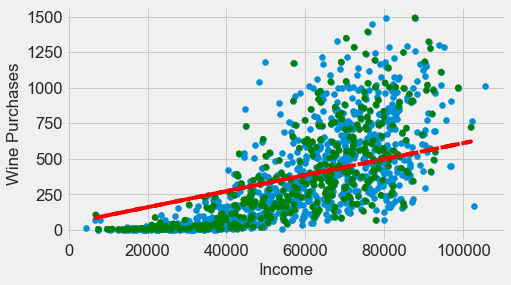

In [99]:
plt.scatter(X3,y3)
plt.scatter(X_test3, y_test3, linestyle = 'dashed', color='g')  #test data
plt.plot(X_test3, y_predict_test3, linestyle = 'dashed', color='r') #predict
plt.xlabel("Income")
plt.ylabel("Wine Purchases")
plt.show()

In [100]:
print('The score in Ridge Reg is: {}'.format(r_sq))

The score in Ridge Reg is: 0.36684359921958387


## 4. Polynomial Regression

In [101]:
X2 = reformat_df.Income.values
y2 = reformat_df.MntWines.values

mymodel = np.poly1d(np.polyfit(X2, y2, 3))
print(mymodel)

            3             2
-2.625e-12 x + 4.784e-07 x - 0.01483 x + 121.5


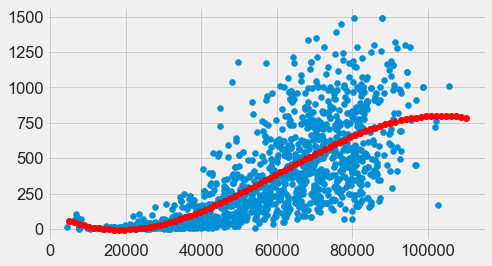

In [102]:
myline = np.linspace(5000, 110000, 80)

plt.scatter(X2, y2)
plt.plot(myline, mymodel(myline), 'ro')
plt.show()

In [107]:
polyReg_Score = r2_score(y2, mymodel(X2))

print('The score in Polynomial Reg is: {}'.format(polyReg_Score))
linReg_Score = r2_score(y2, origRegModel(X2))

The score in Polynomial Reg is: 0.5174709460939515


# Comparison & Conclusion

Text(0, 0.5, 'Wine Purchases')

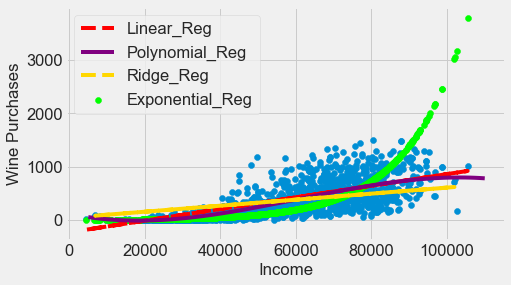

In [108]:
plt.scatter(X2,y2)
plt.scatter(X2, exponential_Regression_fit_rawValues(X2), color='lime', label="Exponential_Reg")
plt.plot(X2, origRegModel(X2), linestyle = 'dashed', color='r', label="Linear_Reg")
plt.plot(myline, mymodel(myline), color='purple', label="Polynomial_Reg")
plt.plot(X_test3, y_predict_test3, linestyle = 'dashed', color='gold', label="Ridge_Reg")
plt.legend()
plt.xlabel("Income")
plt.ylabel("Wine Purchases")

In [109]:
print('The score in Polynomial Reg is: {}'.format(polyReg_Score))
print('The score in Linear Reg is: {}'.format(linReg_Score))
print('The score in Ridge Reg is: {}'.format(r_sq))
print('The score in Exponential Reg is: {}'.format(expReg_Score))

The score in Polynomial Reg is: 0.5174709460939515
The score in Linear Reg is: 0.49345622539303147
The score in Ridge Reg is: 0.36684359921958387
The score in Exponential Reg is: -0.09221381497863157


### Since R2 is similar for Poly/Lin Regression, we will look at the MSE and Goodness of fit Test results for these two Models only.

In [110]:
y_actual = y1                   #observed y values
y_predicted = reg.predict(X1)   #predicted y values
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
print('MSE of Linear Reg Model:',MSE)               
# print('Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))):',reg.singular_)

MSE of Linear Reg Model: 54267.32302604561


In [111]:
y_actual = y2               #observed y values
y_predicted = mymodel(X2)   #predicted y values
MSE = np.square(np.subtract(y_actual,y_predicted)).mean()
print('MSE of Polynomial Reg Model:',MSE)               
# print('Singular values of x i.e. (Sqrt(Sum(Xi - X_Avg))):',reg.singular_)

MSE of Polynomial Reg Model: 53328.91044036507


### Chi Square Goodness of Fit

In [112]:
Income = []
Prediction = []

for row in stratified_random_sample.iterrows():
    Income.append(row[1][1])

for i in Income:
    Prediction.append(mymodel(i).tolist())

print(Prediction)

[719.7803530788934, 75.26088209233592, 629.1183272956512, 602.3844977347147, 55.685647298658864, 725.0134118182458, 697.4892532591758, 602.596144819166, 718.4203893090198, 745.0821534844457, 679.5309188078082, 252.4525947072146, 527.5216982942785, 664.3785717108616, 572.0881997261583, 406.9310992635198, 689.7026739789089, 583.6539143537035, 586.1048281304594, 767.7797933857308, 687.8040471829718, 693.7537486462785, 304.49769480799984, -5.121318719573338, 556.3181805449867, 674.9979824786309, 515.32330815694, 421.6330724568658, 75.55750999143656, 49.7777791801758, 711.6606675477873, 64.99131189395302, 405.9352002182296, 53.05288055903628, 332.68676282001286, 553.1716237564087, 555.3541355775952, 400.07286878758964, 305.2895241568794, 60.70769309968063, 554.6403921347438, 458.16830465622394, 412.7203504675641, 552.0321632764669, 363.33814585509026, 441.36273657440455, 453.68565676379984, 133.17440608864314, 36.071219092774655, 44.414207786243566, 434.8465341441622, 360.0199438800622, 524

In [113]:
from scipy.stats import chisquare

(chisq, pvalue) = chisquare(f_obs=observation, f_exp=Prediction,ddof=0)    #0 is the MLE of variance for sample s.d. of the believed normally distributed variables 
print('The chi-square for Polynomial Reg is',chisq)
print('The P-value is', pvalue)

The chi-square for Polynomial Reg is 5398.621425389239
The P-value is 0.0


In [114]:
from scipy.stats import chisquare

(chisq, pvalue) = chisquare(f_obs=observation, f_exp=flat_list,ddof=0)    #0 is the MLE of variance for sample s.d. of the believed normally distributed variables 
print('The chi-square for Linear Regression is',chisq)
print('The P-value is', pvalue)

The chi-square for Linear Regression is 5114.886074452068
The P-value is 0.0


## Conclusion:

Polynomial Regression is the best fit model as:

> R2: 0.5174709460939515 > 0.49345622539303147 (Polynomial model has slightly higher R2 indicating that there are smaller differences between the observed data and the predicted values)

> MSE: 53328.91044036507 < 54267.32302604561 (Polynomial Model has slightly lower errors)

# Clustering - K mean

In [115]:
# Sweet, Fruit & Fish
sweet_fruit_fish = reformat_df[['MntFruits','MntFishProducts', 'MntSweetProducts']]
sweet_fruit_fish.head(3)

,MntFruits,MntFishProducts,MntSweetProducts
0,88,172,88
1,49,111,21
2,4,10,3


- normalize the data so that the scale of each variable is the same

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(sweet_fruit_fish)
scaled_df = scaler.transform(sweet_fruit_fish)
scaled_df = pd.DataFrame(scaled_df , columns=sweet_fruit_fish.columns)
scaled_df.head(3)

,MntFruits,MntFishProducts,MntSweetProducts
0,1.058090,1.918948,1.011848
1,0.188643,0.906141,-0.453902
2,-0.814566,-0.770801,-0.847686


- use an elbow plot to find the optimal number of clusters

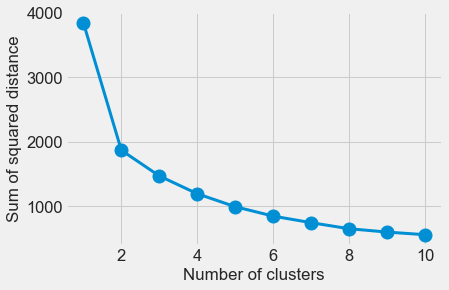

In [117]:
# testing for Elbow Point
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 11))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 4))
plt.plot(list_k, sse, '-o', linewidth=3, markersize=13)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()

- a drastic reduction in SSE until **2**, and slowly become gradual afterwards, hence we decide to get 2 clusters

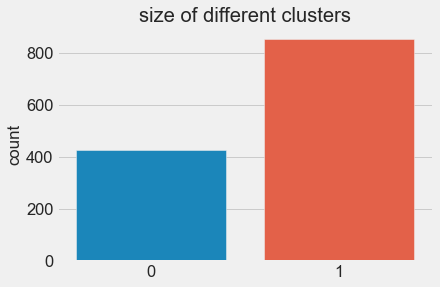

In [118]:
# implement k-means

X = scaled_df.values

km = KMeans(n_clusters = 2, init='k-means++', random_state=123)
y_cluster = km.fit_predict(X)

# countplot to check the number of customers in each cluster
plt.figure(figsize=(6, 4))
sns.countplot(y_cluster)
plt.title('size of different clusters')
plt.show()

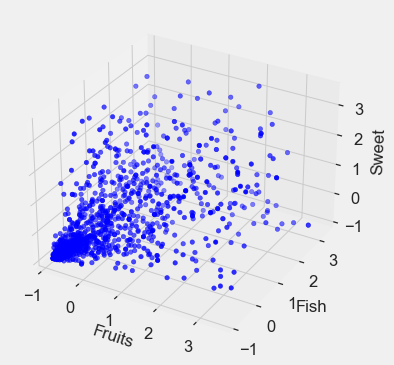

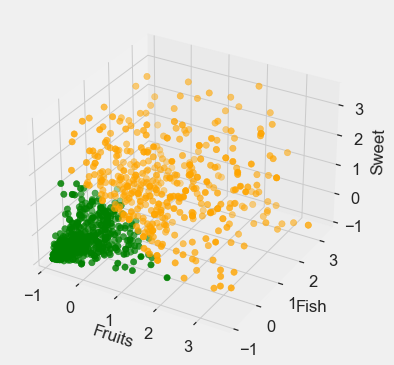

In [119]:
# --------------------------------3D plot without clusters-------------------------------- #
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = scaled_df.MntFruits
y_vals = scaled_df.MntFishProducts
z_vals = scaled_df.MntSweetProducts

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax.set_xlabel('Fruits')
ax.set_ylabel('Fish')
ax.set_zlabel('Sweet')

# ----------------------------------3D plot with clusters---------------------------------- #
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_cluster == 0,0],X[y_cluster == 0,1],X[y_cluster == 0,2], 
           s = 40 , color = 'orange', label = "cluster 0")
ax.scatter(X[y_cluster == 1,0],X[y_cluster == 1,1],X[y_cluster == 1,2], 
           s = 40 , color = 'green', label = "cluster 1")

ax.set_xlabel('Fruits')
ax.set_ylabel('Fish')
ax.set_zlabel('Sweet')
plt.show()

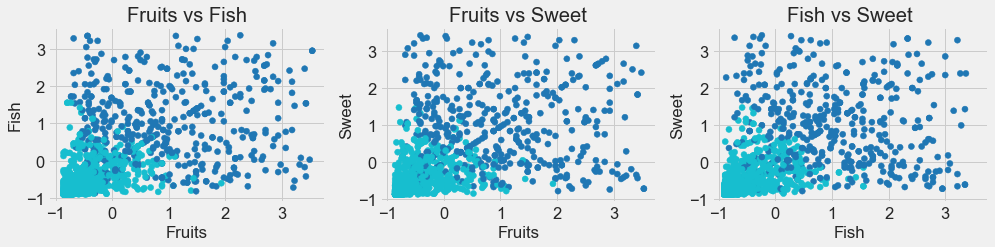

In [120]:
# 2D plots
fig, (ax1, ax2, ax3) =  plt.subplots(figsize = (15,3), nrows = 1, ncols = 3, sharex = True)

ax1.scatter(x_vals, y_vals, c=y_cluster, cmap='tab10')
ax1.set_xlabel('Fruits')
ax1.set_ylabel('Fish')
ax1.set_title('Fruits vs Fish')

ax2.scatter(x_vals, z_vals, c=y_cluster, cmap='tab10')
ax2.set_xlabel('Fruits')
ax2.set_ylabel('Sweet')
ax2.set_title('Fruits vs Sweet')

ax3.scatter(y_vals, z_vals, c=y_cluster, cmap='tab10')
ax3.set_xlabel('Fish')
ax3.set_ylabel('Sweet')
ax3.set_title('Fish vs Sweet')

plt.show()

In [121]:
# assign datapoints to clusters
cluster_df = reformat_df.copy()
cluster_df['Cluster'] = y_cluster
cluster_df.head(3)

,Age,Income,Dependents,Days_Regis,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Cluster
0,64,58138.0,0,3275,58,635,88,546,172,88,0
1,56,71613.0,0,2924,26,426,49,127,111,21,1
2,37,26646.0,1,2751,26,11,4,20,10,3,1


# clusters analysis

In [122]:
cluster_df_mean = cluster_df.groupby('Cluster').mean().reset_index()
cluster_df_mean

,Cluster,Age,Income,Dependents,Days_Regis,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0,52.221445,73322.652681,0.365967,2999.013986,49.384615,549.296037,84.967366,412.473193,118.300699,88.144522
1,1,51.771395,49946.011723,0.941383,2968.709261,49.575615,285.529894,18.193435,136.616647,25.304807,18.413834


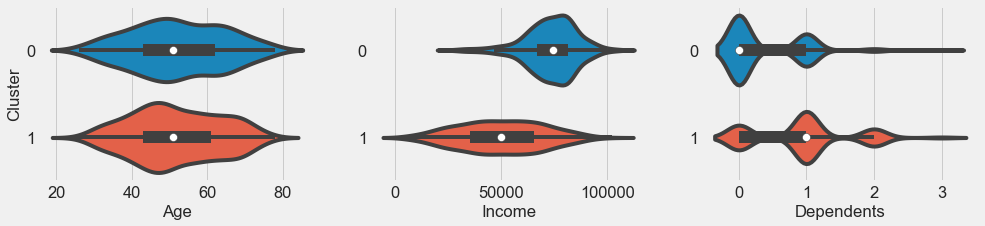

In [123]:
# visualizing the differences on customers' Age, Income and Dependents between clusters
plt.figure(1, figsize=(15,3))
n=0
for cols in ['Age','Income','Dependents']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    sns.violinplot(y='Cluster', x=cols, data=cluster_df, orient='h')
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

- There is no much difference on customers' age between two clusters

**cluster 0**
- lower income : average 50k
- majority of them have kids

**cluster 1**
- higher income : average 73k
- majority of them have no kids

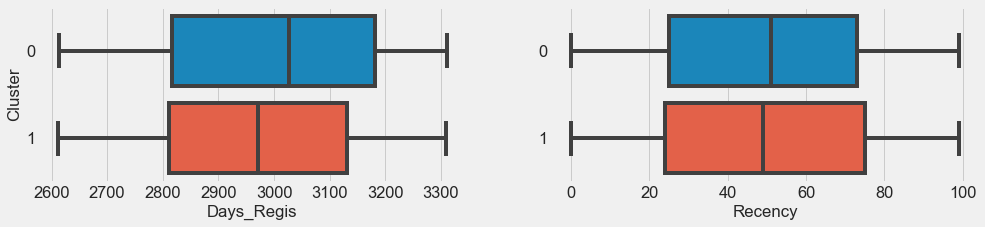

In [124]:
# compare Days_Regis, Recency between clusters
plt.figure(1, figsize=(15,3))
n=0
for cols in ['Days_Regis','Recency']:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    sns.boxplot(y='Cluster', x=cols, data=cluster_df, orient='h')
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

- **cluster 1** seems to have slightly more days of registration, probably are regular / loyal members
- no much differences in recency between clusters

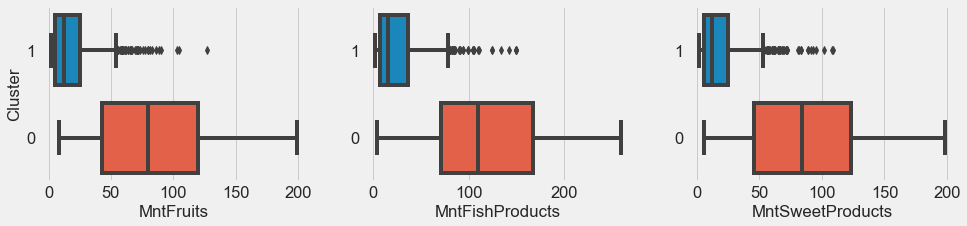

In [125]:
# compare amount of spendings on diffrent products between clusters
plt.figure(1, figsize=(25,3))
n=0
for cols in ['MntFruits','MntFishProducts', 'MntSweetProducts']:
    n+=1
    plt.subplot(1,5,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)
    asc_order = cluster_df.groupby(by=["Cluster"])[cols].mean().sort_values()

    sns.boxplot(y='Cluster', x=cols, data=cluster_df, orient='h', order=asc_order.index)
    plt.ylabel('Cluster' if n==1 else '')
plt.show()

- **cluster 1 have higher amount of spendings on fruits, fish and sweet products**
- so we used the sum of all products to see their overall purchasing habits

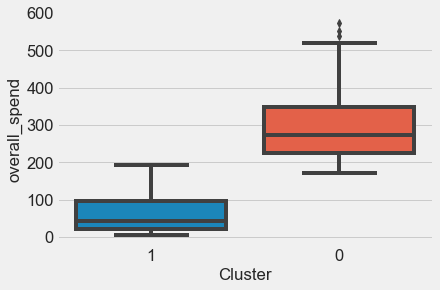

In [126]:
# compare overall spendings (excluding wine and meat products) between clusters
cluster_df['overall_spend'] = (cluster_df['MntFruits']+cluster_df['MntFishProducts']+cluster_df['MntSweetProducts'])

order = cluster_df.groupby(by=["Cluster"])["overall_spend"].mean().sort_values()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Cluster', y='overall_spend', data = cluster_df, order=order.index)
plt.show()

- cluster 0 customers have lowest amount of expenditures
- **cluster 1** customers have the highest amount of expenditures

## Summary

> <span style='color:green'> **cluster 0** </span>
- lower income : average 50k
- majority of them have kids
- more days of registration
- lower amount of spendings on fruits, fish and sweet products


> <span style='color:red'> **cluster 1** </span>
- higher income : **average 73k**
- majority of them **have no kids**
- **higher amount of spendings** on fruits, fish and sweet products

